In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
data = pd.read_csv('train.csv',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 285.5 KB


In [85]:
data.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.050,NaN,S
140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.200,B86,C
169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S
334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.000,NaN,S
457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.550,E38,S


In [86]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
data['Sex'] = data['Sex'].astype('int32')

In [87]:
data_with_nan = data.copy()
data.dropna(how='any', inplace=True)
data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
783,0,1,"Long, Mr. Milton Clyde",1,29.0,0,0,113501,30.0000,D6,S
391,1,1,"Carter, Mr. William Ernest",1,36.0,1,2,113760,120.0000,B96 B98,S
341,1,2,"Navratil, Master. Edmond Roger",1,2.0,1,1,230080,26.0000,F2,S
824,1,3,"Moor, Mrs. (Beila)",0,27.0,0,1,392096,12.4750,E121,S
463,0,1,"Gee, Mr. Arthur H",1,47.0,0,0,111320,38.5000,E63,S
854,1,1,"Lines, Miss. Mary Conover",0,16.0,0,1,PC 17592,39.4000,D28,S
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",0,24.0,0,0,PC 17482,49.5042,C90,C
276,1,1,"Andrews, Miss. Kornelia Theodosia",0,63.0,1,0,13502,77.9583,D7,S
457,0,1,"Millet, Mr. Francis Davis",1,65.0,0,0,13509,26.5500,E38,S


In [88]:
def return_number(x):
    for element in x.split():
        if element.isdigit():
            return element

    print(x)
    return None

In [89]:
data['Ticket'] = data['Ticket'].apply(
    lambda x: x if isinstance(x, int) else return_number(str(x))
)


In [90]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Name      183 non-null    object 
 3   Sex       183 non-null    int32  
 4   Age       183 non-null    float64
 5   SibSp     183 non-null    int64  
 6   Parch     183 non-null    int64  
 7   Ticket    183 non-null    object 
 8   Fare      183 non-null    float64
 9   Cabin     183 non-null    object 
 10  Embarked  183 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 53.0 KB


In [91]:
data['Ticket'] = data['Ticket'].astype('int')

In [92]:
import re
data.insert(9, 'Cabine type', data['Cabin'].astype(str).str[0])

def extract_number(cabin):
    match = re.search(r'\d+', cabin)
    return int(match.group()) if match else None


data.insert(10, 'Cabine number', data['Cabin'].apply(extract_number))
data.drop('Cabin', axis=1, inplace=True)


In [93]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       183 non-null    int64  
 1   Pclass         183 non-null    int64  
 2   Name           183 non-null    object 
 3   Sex            183 non-null    int32  
 4   Age            183 non-null    float64
 5   SibSp          183 non-null    int64  
 6   Parch          183 non-null    int64  
 7   Ticket         183 non-null    int64  
 8   Fare           183 non-null    float64
 9   Cabine type    183 non-null    object 
 10  Cabine number  179 non-null    float64
 11  Embarked       183 non-null    object 
dtypes: float64(3), int32(1), int64(5), object(3)
memory usage: 45.7 KB


In [94]:
map_of_ports = {
    'C': 1, #Cherbourg
    'Q': 2, #Queenstown
    'S':3  #Southampton
}
data['Embarked'] = data['Embarked'].apply(lambda x: map_of_ports[x])


In [95]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 2 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       183 non-null    int64  
 1   Pclass         183 non-null    int64  
 2   Name           183 non-null    object 
 3   Sex            183 non-null    int32  
 4   Age            183 non-null    float64
 5   SibSp          183 non-null    int64  
 6   Parch          183 non-null    int64  
 7   Ticket         183 non-null    int64  
 8   Fare           183 non-null    float64
 9   Cabine type    183 non-null    object 
 10  Cabine number  179 non-null    float64
 11  Embarked       183 non-null    int64  
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 38.2 KB


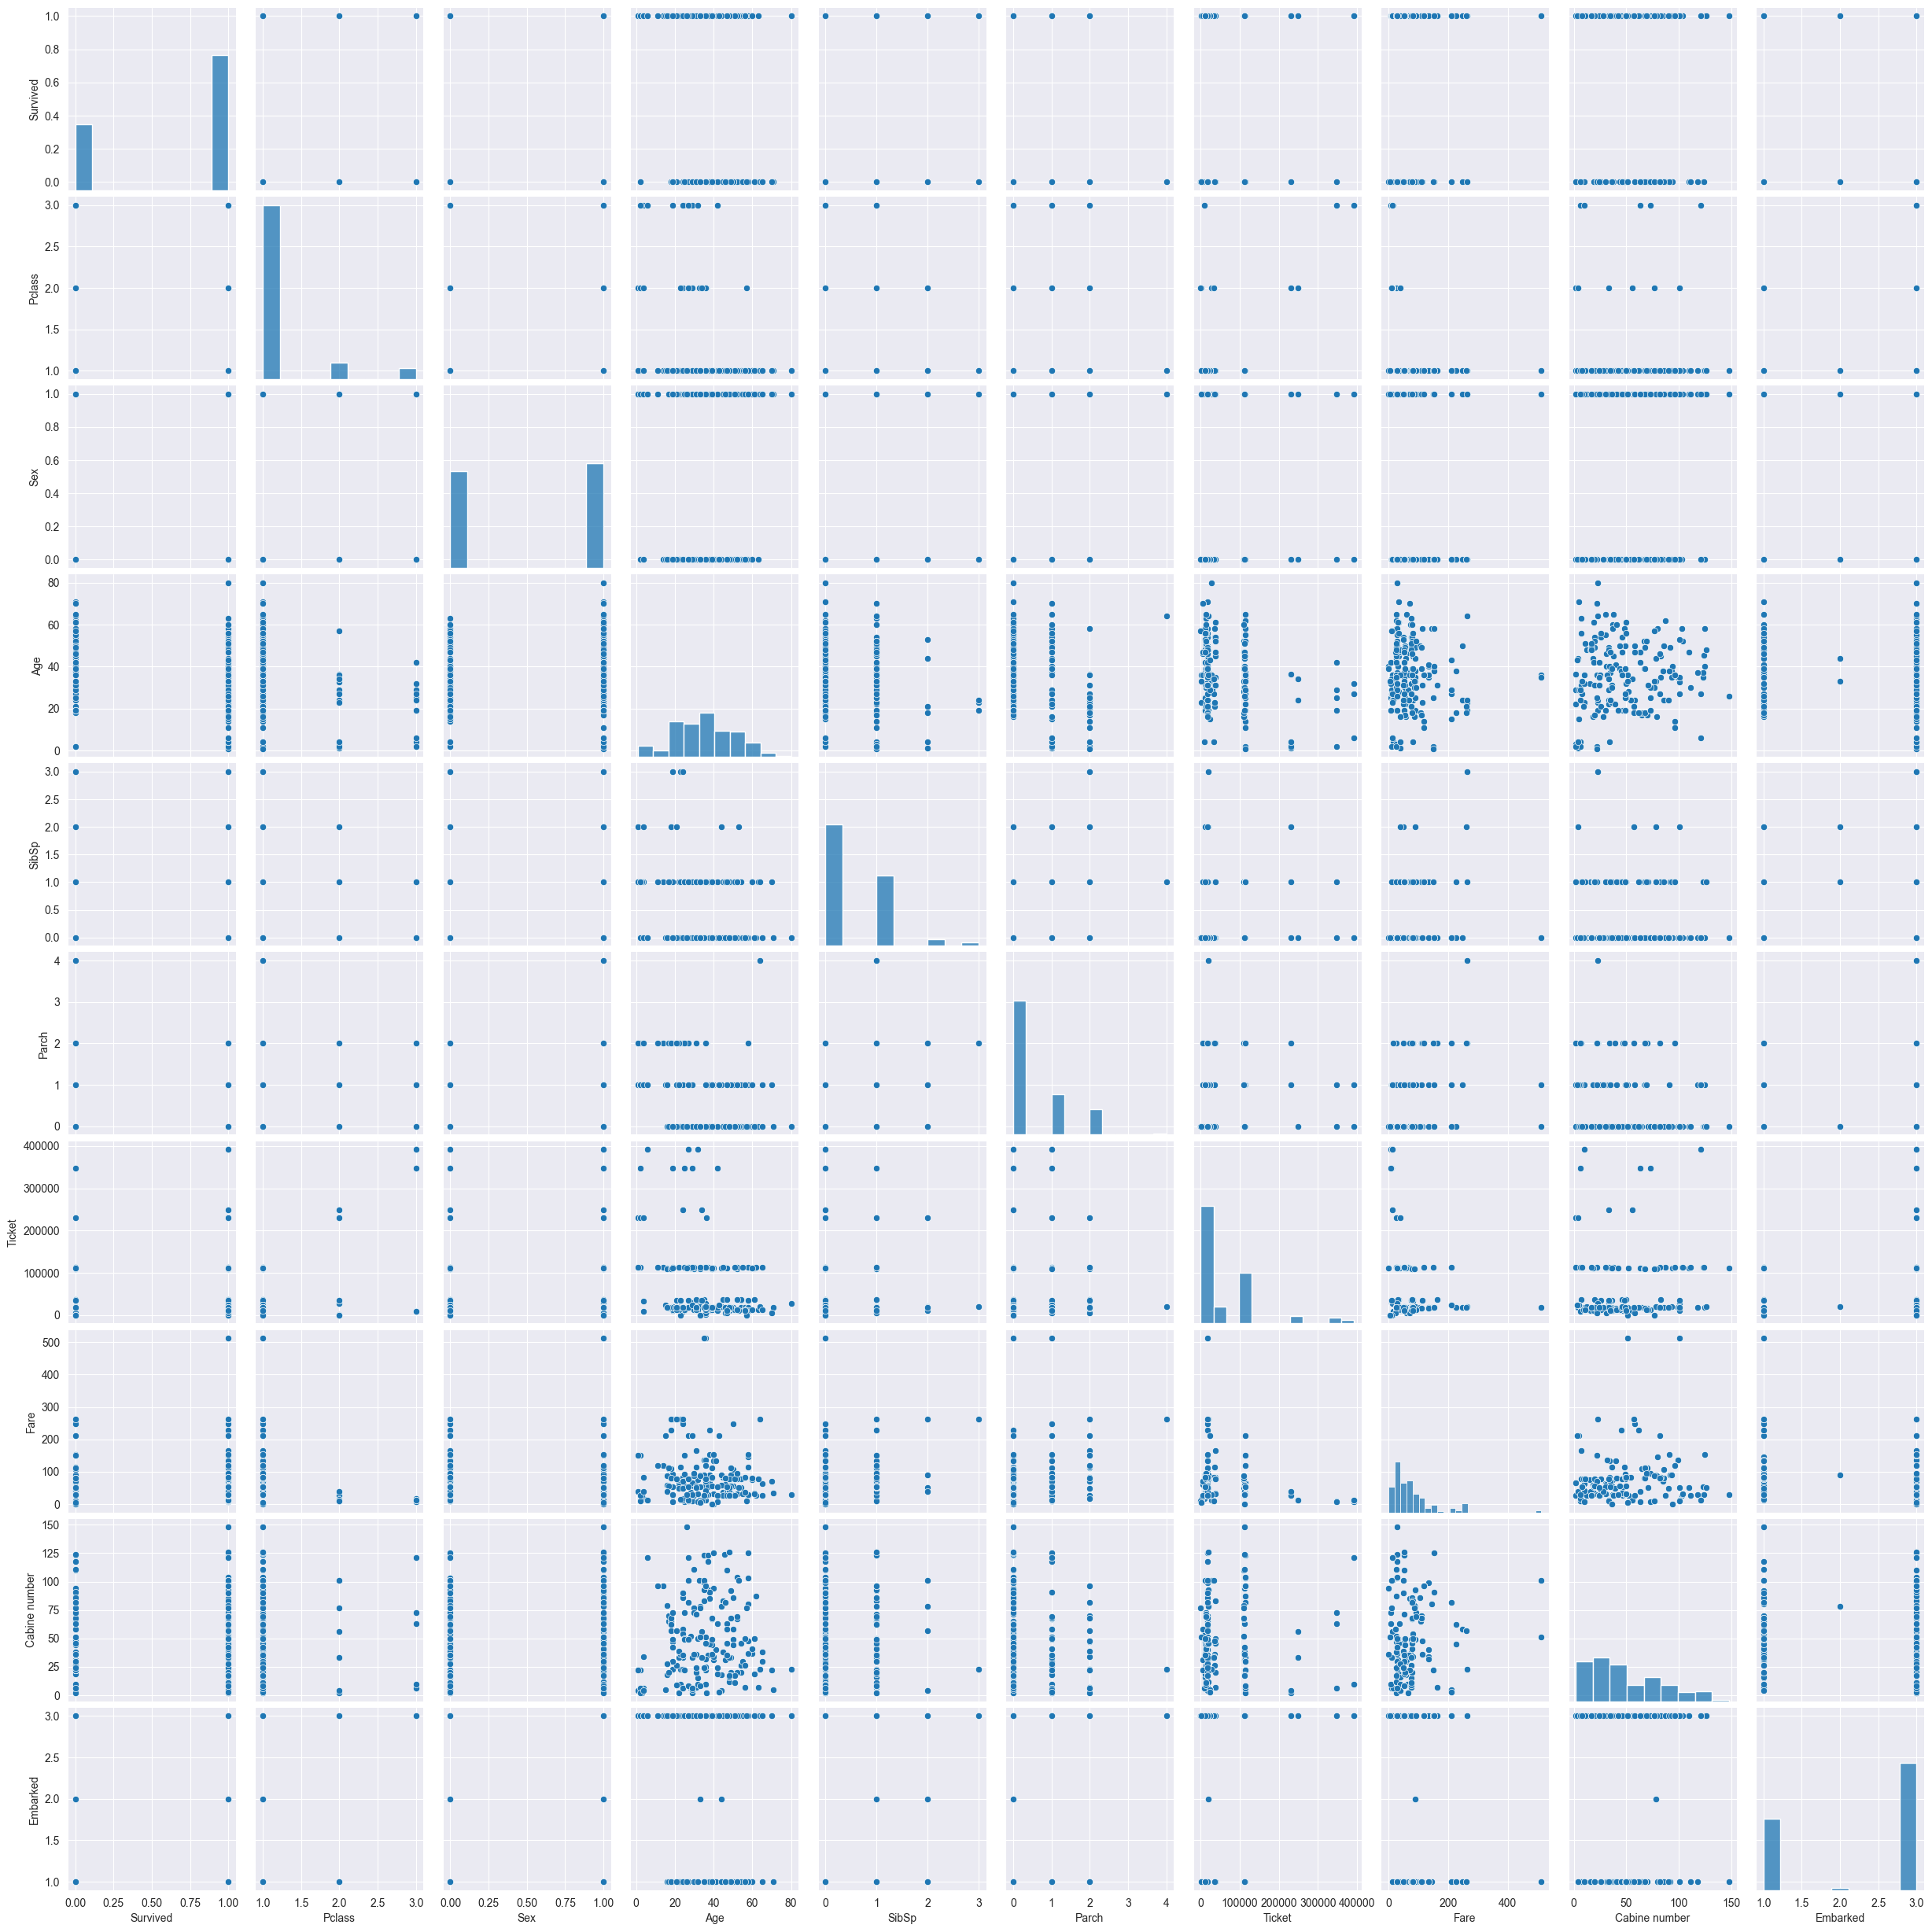

In [96]:
sns.pairplot(data)